# Comparison with constraint generation method

Constraint generation method:
1. Solve least-squares problem for tumor dose without any dose-volume constraints
2. Sort OAR voxels by dose received to determine where to apply max constraints
3. Resolve least-squares problem for tumor dose with max constraints on subset of OAR voxels

In [1]:
% Add path to data, CT images, and solver
addpath(genpath('PROSTATE'));
addpath(genpath('Prostate_Dicom'));
addpath(genpath('minConf'));

In [2]:
% Prostate
prostate.name = 'PTV_68';
pt1.type = 'unif'; pt1.dose = 81; pt1.weight = 1;
pt2.type = 'ldvc'; pt2.dose = 0.95*81; pt2.percent = 95; pt2.weight = 1;
pt3.type ='udvc'; pt3.dose = 1.05*81; pt3.percent = 5; pt3.weight = 1;

% Lymph nodes
nodes.name = 'PTV_56';
nt1.type = 'unif'; nt1.dose = 60; nt1.weight = 1;
nt2.type = 'ldvc'; nt2.dose = 0.95*60; nt2.percent = 95; nt2.weight = 1;
nt3.type = 'udvc'; nt3.dose = 1.05*60; nt3.percent = 5; nt3.weight = 1;

% Rectum
rectum.name = 'Rectum';
rt1.type = 'udvc'; rt1.dose = 50; rt1.percent = 50; rt1.weight = 1;
rt2.type = 'udvc'; rt2.dose = 30; rt2.percent = 30; rt2.weight = 1;
rt3.type = 'udvc'; rt3.dose = 10; rt3.percent = 10; rt3.weight = 1;
rt4.type = 'udvc'; rt4.dose = 75; rt4.percent = 0; rt4.weight = 1;
rt5.type = 'udvc'; rt5.dose = 60; rt5.percent = 20; rt5.weight = 1;
rt6.type = 'udvc'; rt6.dose = 20; rt6.percent = 60; rt6.weight = 1;

% Bladder
bladder.name = 'Bladder';
bt1.type = 'udvc'; bt1.dose = 30; bt1.percent = 30; bt1.weight = 1;

% Problem parameters
pars.angles = 0:52:358;
pars.lambda = 1e-8;
pars.maxIter = 500;
pars.overlap = false;
pars.tol = 1e-5;

In [3]:
%%file compareVoxels.m
function compareVoxels(f,struct,term,xa,xb,c)

da = f.structs{struct}.A*xa;
subplot(1,3,1)
plot(da,'.'), hold on
plot([0 length(da)],[c c])
ylabel('Dose')
title('Our Method Ax')

subplot(1,3,2)
plot(f.structs{struct}.terms{term}.w + c,'.'), hold on
plot([0 length(f.structs{struct}.terms{term}.w)],[c c])
xlabel('Index')
title('Our Method W')

db = f.structs{struct}.A*xb;
subplot(1,3,3)
plot(db,'.'), hold on
plot([0 length(db)],[c c])
title('Constraint Generation Ax')

Created file '/Users/Kelsey/Dropbox (uwamath)/FluenceMapOpt/compareVoxels.m'.


In [4]:
%%file getPercent.m
function p = getPercent(f,struct,term,x)

Ax = f.structs{struct}.A*x;
d = f.structs{struct}.terms{term}.dose;
n = f.structs{struct}.nVoxels;
p = 100*sum(Ax > d)/n;

Created file '/Users/Kelsey/Dropbox (uwamath)/FluenceMapOpt/getPercent.m'.


## Example 4.1(a)

* PTV: Uniform dose of 81 Gy to prostate
* OAR: No more than 50% of rectum volume may exceed 50 Gy

Method | % OAR > 50
-|-
Initialization | 56.80
Our Method | 51.52
Constraint Generation | 49.50

In [66]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt1};
pars.structs = {prostate,rectum};

% Create problem instance
f1 = FluenceMapOpt(pars);
fprintf('Initialization: %.2f\n', getPercent(f1,2,1,f1.xInit));

Initialization: 56.80


Our Method: 51.52


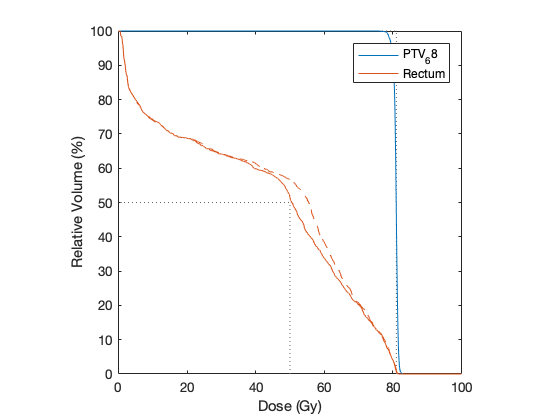

In [67]:
% Solve with our method
f1.calcDose(); x1a = f1.x;
f1.plotDVH();
fprintf('Our Method: %.2f\n', getPercent(f1,2,1,x1a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Constraint Generation: 50.00

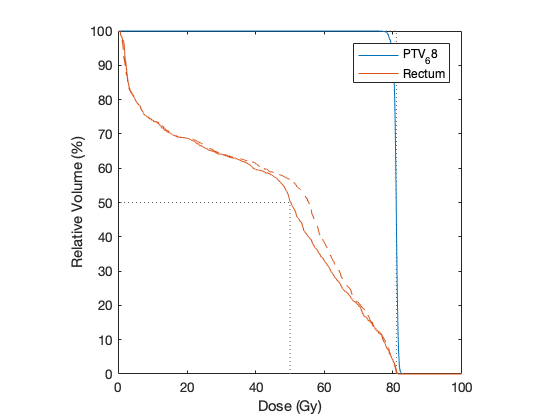

In [68]:
% Solve with constraint generation method
f1.constGen(); x1b = f1.x;
f1.plotDVH();
fprintf('Constraint Generation: %.2f', getPercent(f1,2,1,x1b));

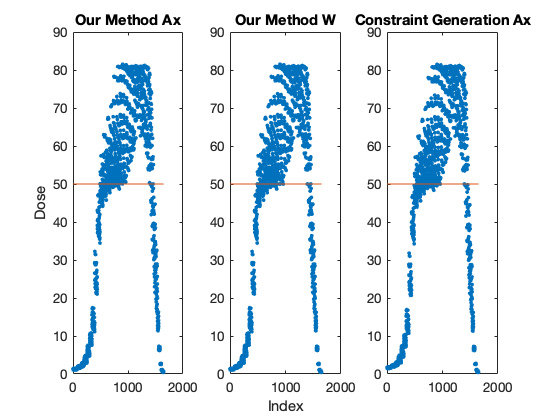

In [95]:
% Comparing voxels
compareVoxels(f1,2,1,x1a,x1b,50)

% Methods seem to target same voxels. Could be due in part to using same initialization.

## Example 4.1(b)

* PTV: Uniform dose of 81 Gy to prostate
* OAR: No more than 30% of rectum volume may exceed 30 Gy

Method | % OAR > 30
-|-
Initialization | 64.14
Our Method | 33.37
Constraint Generation | 29.98

In [70]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt2};
pars.structs = {prostate,rectum};

% Create problem instance
f2 = FluenceMapOpt(pars);
fprintf('Initialization: %.2f\n', getPercent(f2,2,1,f2.xInit))

Initialization: 64.14


Our Method: 33.37


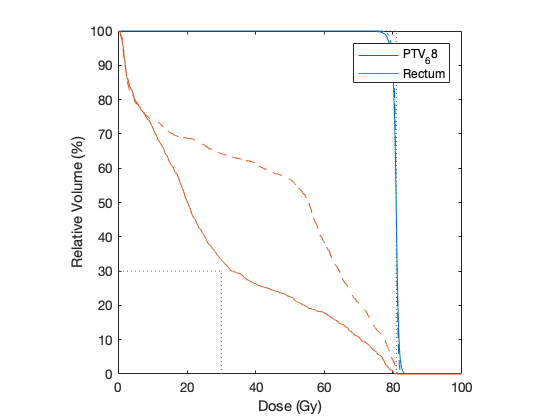

In [71]:
% Solve with our method
f2.calcDose(); x2a = f2.x;
f2.plotDVH();
fprintf('Our Method: %.2f\n', getPercent(f2,2,1,x2a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Constraint Generation: 29.98

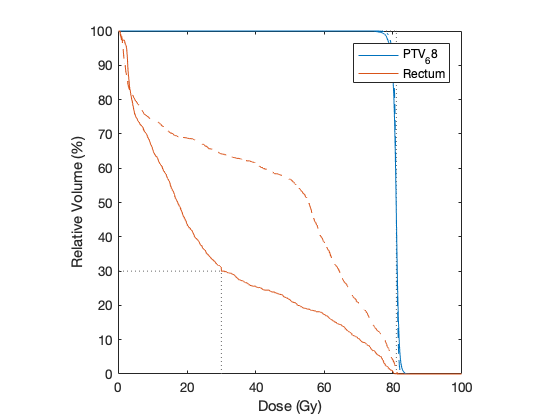

In [72]:
% Solve with constraint generation method
f2.constGen(); x2b = f2.x;
f2.plotDVH();
fprintf('Constraint Generation: %.2f', getPercent(f2,2,1,x2b))

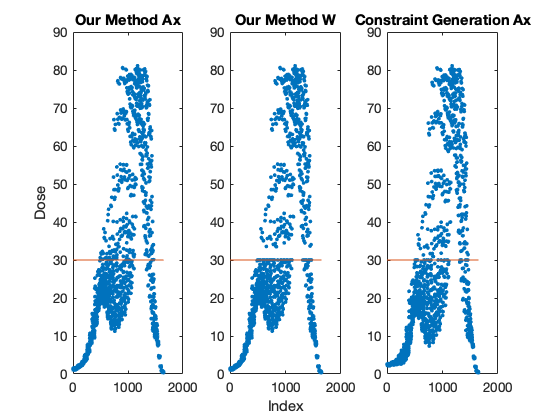

In [96]:
% Comparing voxels
compareVoxels(f2,2,1,x2a,x2b,30)

## Example 4.1(c)

* PTV: Uniform dose of 81 Gy to prostate
* OAR: No more than 10% of rectum volume may exceed 10 Gy

Method | % OAR > 10
-|-
Initialization | 73.97
Our Method | 23.91
Constraint Generation | 8.19

In [74]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt3};
pars.structs = {prostate,rectum};

% Create problem instance
f3 = FluenceMapOpt(pars);
fprintf('Initialization: %.2f\n', getPercent(f3,2,1,f3.xInit))

Initialization: 73.97


Our Method: 23.91


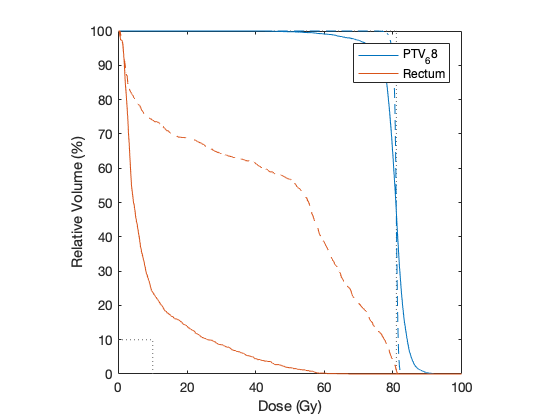

In [75]:
% Solve with our method
f3.calcDose(); x3a = f3.x;
f3.plotDVH();
fprintf('Our Method: %.2f\n', getPercent(f3,2,1,x3a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Constraint Generation: 8.19

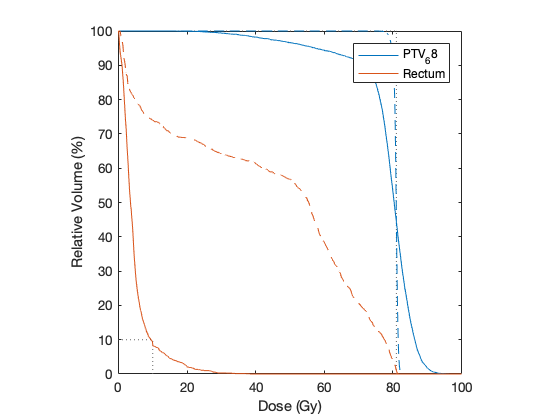

In [76]:
% Solve with constraint generation method
f3.constGen(); x3b = f3.x;
f3.plotDVH();
fprintf('Constraint Generation: %.2f', getPercent(f3,2,1,x3b))

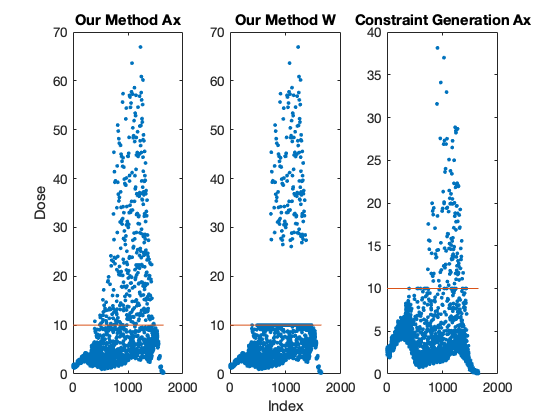

In [97]:
% Comparing voxels
compareVoxels(f3,2,1,x3a,x3b,10)

% Ooh, now we have something a little different!

## Example 4.2

* PTV: Uniform dose of 81 Gy to prostate
* OAR: 
    * No more than 0% of the rectum volume may exceed 75 Gy
    * No more than 20% of the rectum volume may exceed 60 Gy
    * No more than 50% of the rectum volume may exceed 50 Gy
    * No more than 60% of rectum volume may exceed 20 Gy

Method | % OAR > 75 | % OAR > 60 | % OAR > 50 | % OAR > 20 
-|-|-|-|-
Initialization | 13.41 | 38.47 | 56.80 | 68.81
Our Method | 3.88 | 21.84 | 46.60 | 61.35
Constraint Generation | 0.00 | 19.36 | 39.08 | 60.01

In [88]:
% Problem parameters
prostate.terms = {pt1};
rectum.terms = {rt4,rt5,rt1,rt6};
pars.structs = {prostate,rectum};

% Create problem instance
f4 = FluenceMapOpt(pars);
fprintf('Initialization: %.2f, %.2f, %.2f, %.2f\n', getPercent(f4,2,1,f4.xInit), getPercent(f4,2,2,f4.xInit),...
    getPercent(f4,2,3,f4.xInit), getPercent(f4,2,4,f4.xInit))

Initialization: 13.41, 38.47, 56.80, 68.81


Initialization: 3.88, 21.84, 46.60, 61.35


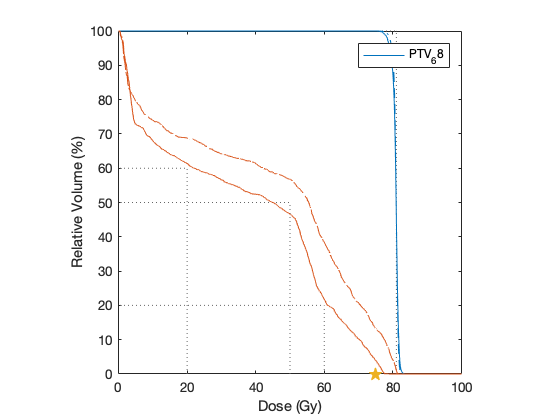

In [89]:
% Solve with our method
f4.calcDose(); x4a = f4.x;
f4.plotDVH();
fprintf('Initialization: %.2f, %.2f, %.2f, %.2f\n', getPercent(f4,2,1,x4a), getPercent(f4,2,2,x4a),...
    getPercent(f4,2,3,x4a), getPercent(f4,2,4,x4a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Initialization: 0.00, 19.36, 39.08, 60.01


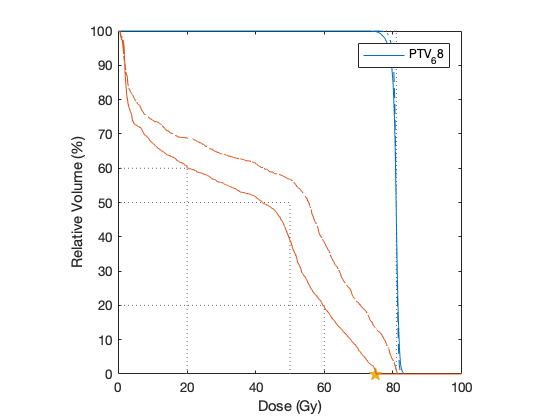

In [90]:
% Solve with constraint generation method
f4.constGen(); x4b = f4.x;
f4.plotDVH();
fprintf('Initialization: %.2f, %.2f, %.2f, %.2f\n', getPercent(f4,2,1,x4b), getPercent(f4,2,2,x4b),...
    getPercent(f4,2,3,x4b), getPercent(f4,2,4,x4b))

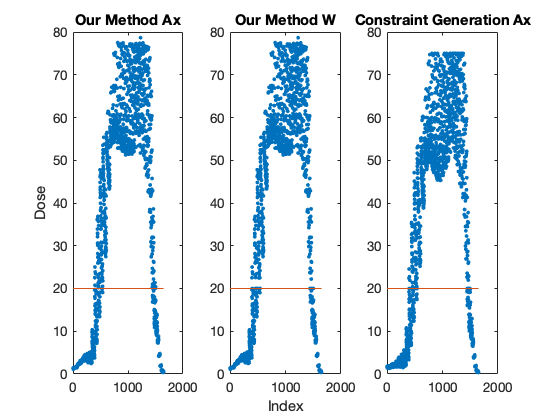

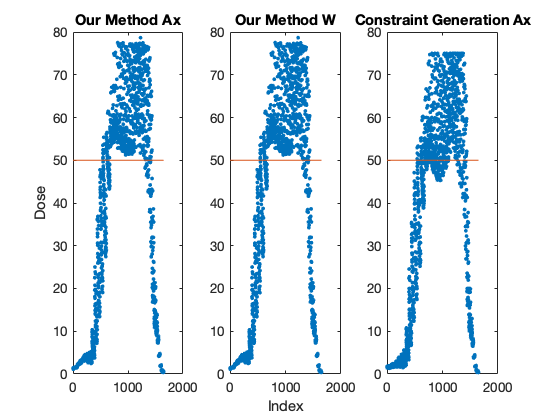

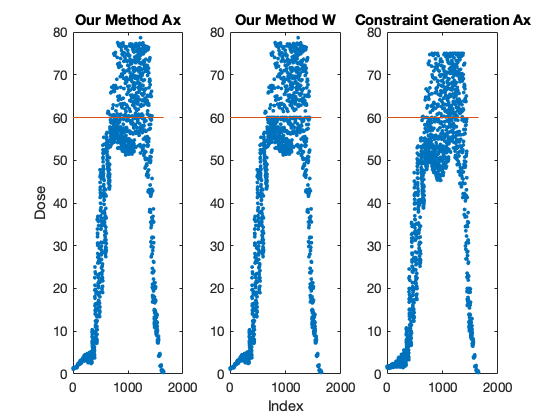

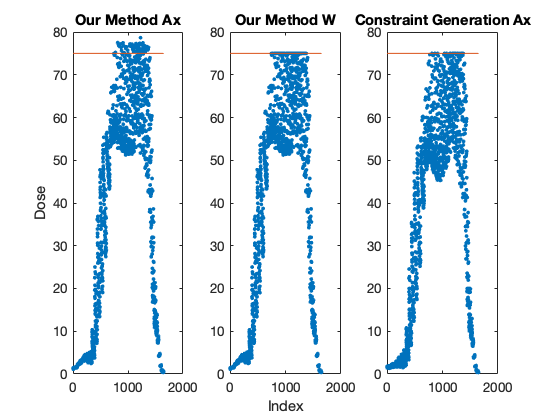

In [103]:
% Comparing voxels
compareVoxels(f4,2,1,x4a,x4b,75)
figure, compareVoxels(f4,2,2,x4a,x4b,60)
figure, compareVoxels(f4,2,3,x4a,x4b,50)
figure, compareVoxels(f4,2,4,x4a,x4b,20)

## Example 4.3

* PTV: 
    * Uniform dose of 81 Gy to prostate
    * Uniform dose of 60 to lymph nodes
* OAR: 
    * No more than 50% of the rectum volume may exceed 50 Gy
    * No more than 30% of the bladder volume may exceed 30 Gy

Method | % R > 50 | % B > 30
-|-|-
Initialization | 82.04 | 92.21
Our Method | 57.04 | 35.70
Constraint Generation | 50.00 | 29.99

In [105]:
% Problem parameters
prostate.terms = {pt1};
nodes.terms = {nt1};
rectum.terms = {rt1};
bladder.terms = {bt1};
pars.structs = {prostate,rectum,bladder,nodes};

% Create problem instance
f5 = FluenceMapOpt(pars);
fprintf('Initialization: %.2f, %.2f\n', getPercent(f5,2,1,f5.xInit), getPercent(f5,3,1,f5.xInit))

Initialization: 82.04, 92.21


Our Method: 57.04, 35.70


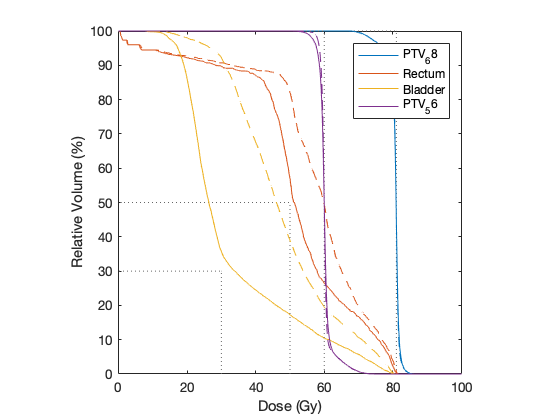

In [106]:
% Solve with our method
f5.calcDose(); x5a = f5.x;
f5.plotDVH();
fprintf('Our Method: %.2f, %.2f\n', getPercent(f5,2,1,x5a), getPercent(f5,3,1,x5a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Constraint Generation: 50.00, 29.99


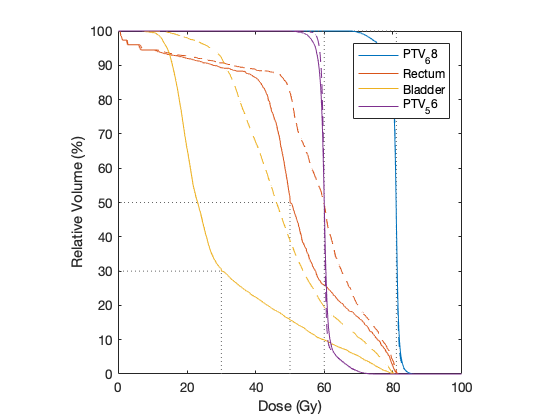

In [107]:
% Solve with constraint generation method
f5.constGen(); x5b = f5.x;
f5.plotDVH();
fprintf('Constraint Generation: %.2f, %.2f\n', getPercent(f5,2,1,x5b), getPercent(f5,3,1,x5b))

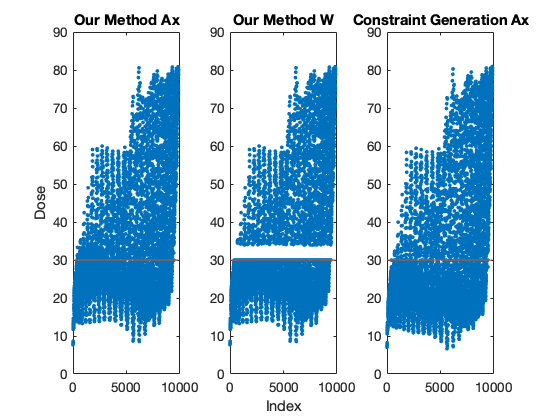

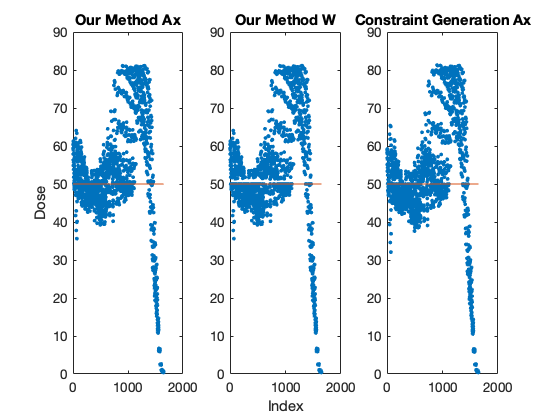

In [111]:
% Comparing voxels
compareVoxels(f5,2,1,x5a,x5b,50)
figure, compareVoxels(f5,3,1,x5a,x5b,30)

## Dose-volume Constraints on PTVs

* PTV: 
    * Uniform dose of 81 Gy to prostate
    * No more than 5% of the prostate volume may receive less than 95% of 81 Gy
    * No more than 5% of the prostate volume may exceed 105% of 81 Gy
    * Uniform dose of 60 to lymph nodes
    * No more than 5% of the lymph nodes volume may receive less than 95% of 60 Gy
    * No more than 5% of the lymph nodes volume may exceed 105% of 60 Gy
* OAR: 
    * No more than 50% of the rectum volume may exceed 50 Gy
    * No more than 30% of the bladder volume may exceed 30 Gy

Method | % P < 76.95 | % P > 85.05 | % R > 50 | % B > 30 | % L < 51 | % L > 63
-|-|-|-|-|-|-
Initialization | 4.74 | 0.15 | 82.04 | 92.21 | 0.74 | 5.73
Our Method | 5.24 | 0.18 | 56.98 | 35.70 | 2.97 | 5.85
Constraint Generation | 4.98 | 0.30 | 49.70 | 29.96 | 4.05 | 4.98

In [5]:
% Problem parameters
prostate.terms = {pt1,pt2,pt3};
nodes.terms = {nt1,nt2,nt3};
rectum.terms = {rt1};
bladder.terms = {bt1};
pars.structs = {prostate,rectum,bladder,nodes};

% % Create problem instance
f6 = FluenceMapOpt(pars);
fprintf('Initialization: %.2f, %.2f, %.2f, %.2f, %.2f, %.2f\n', 100-getPercent(f6,1,2,f6.xInit),...
    getPercent(f6,1,3,f6.xInit), getPercent(f6,2,1,f6.xInit), getPercent(f6,3,1,f6.xInit),...
    100-getPercent(f6,4,2,f6.xInit), getPercent(f6,4,3,f6.xInit))

Initialization: 4.74, 0.15, 82.04, 92.21, 0.74, 5.73


Initialization: 5.24, 0.18, 56.98, 35.70, 2.97, 5.85


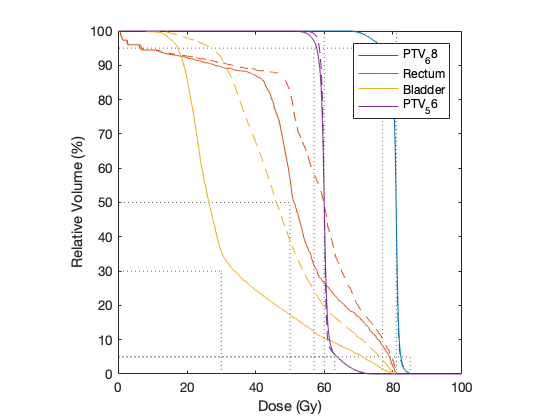

In [6]:
% Solve with our method
f6.calcDose(); x6a = f6.x;
f6.plotDVH();
fprintf('Initialization: %.2f, %.2f, %.2f, %.2f, %.2f, %.2f\n', 100-getPercent(f6,1,2,x6a),...
    getPercent(f6,1,3,x6a), getPercent(f6,2,1,x6a), getPercent(f6,3,1,x6a),...
    100-getPercent(f6,4,2,x6a), getPercent(f6,4,3,x6a))


Minimum found that satisfies the constraints.

Optimization completed because the objective function is non-decreasing in 
feasible directions, to within the value of the optimality tolerance,
and constraints are satisfied to within the value of the constraint tolerance.

Initialization: 4.98, 0.30, 49.70, 29.96, 4.05, 4.98


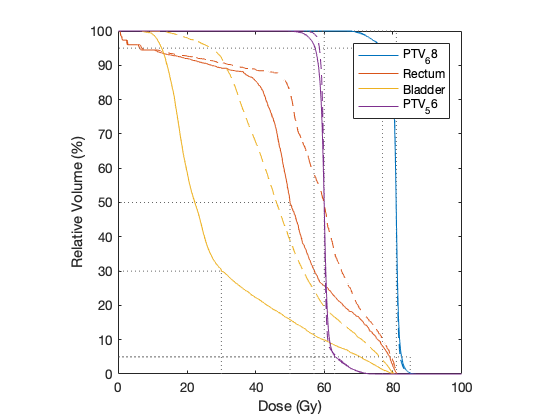

In [7]:
% Solve with constraint generation method
f6.constGen(); x6b = f6.x;
f6.plotDVH();
fprintf('Initialization: %.2f, %.2f, %.2f, %.2f, %.2f, %.2f\n', 100-getPercent(f6,1,2,x6b),...
    getPercent(f6,1,3,x6b), getPercent(f6,2,1,x6b), getPercent(f6,3,1,x6b),...
    100-getPercent(f6,4,2,x6b), getPercent(f6,4,3,x6b))

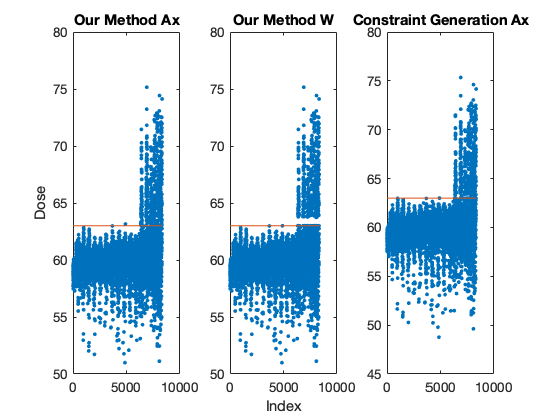

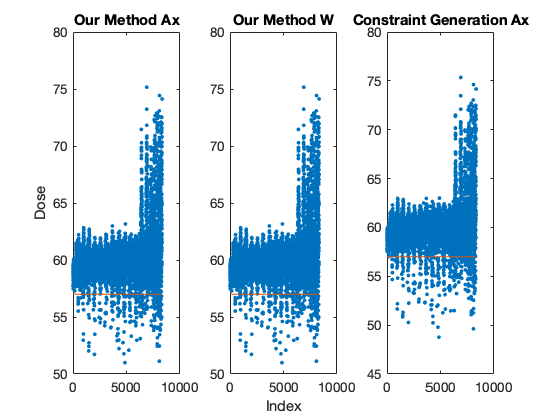

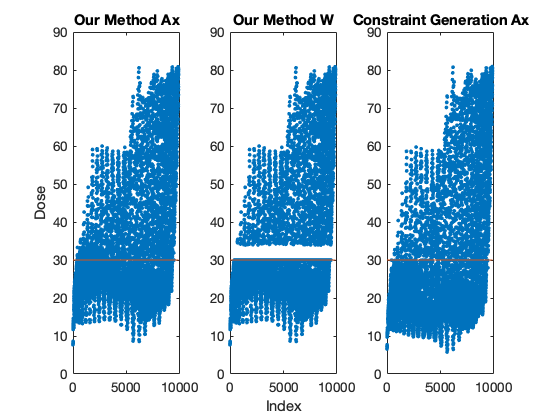

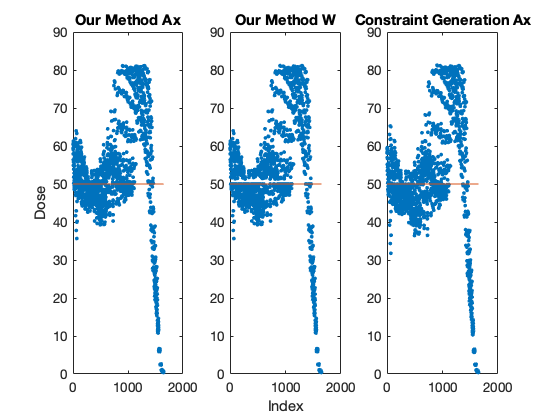

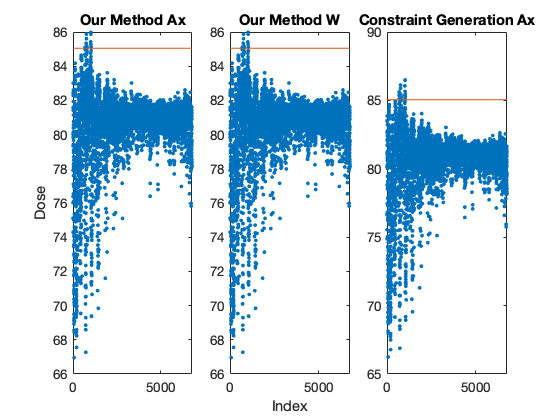

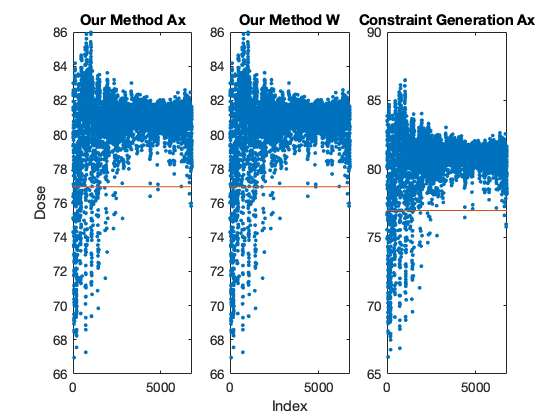

In [10]:
% Comparing voxels
compareVoxels(f6,1,2,x6a,x6b,0.95*81)
figure, compareVoxels(f6,1,3,x6a,x6b,1.05*81)
figure, compareVoxels(f6,2,1,x6a,x6b,50)
figure, compareVoxels(f6,3,1,x6a,x6b,30)
figure, compareVoxels(f6,4,2,x6a,x6b,0.95*60)
figure, compareVoxels(f6,4,3,x6a,x6b,1.05*60)